In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [36]:
def linear_function(w, x, b):
  return w * x + b

def sigmoid_function(z):
  return 1 / (1 + np.exp(-z))

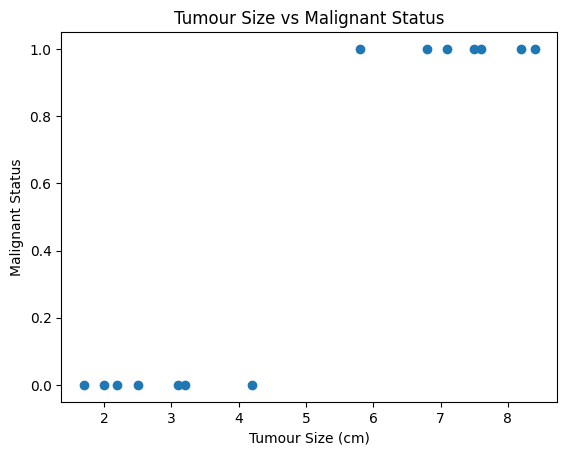

In [37]:
#Given data
data = {
    'Tumour Size (cm)': [7.1, 3.2, 5.8, 2.0, 8.4, 4.2, 7.6, 2.5, 6.8, 1.7, 7.5, 3.1, 8.2, 2.2],
    'Patient Age': [55, 30, 65, 20, 72, 40, 60, 25, 70, 22, 68, 35, 66, 28],
    'Malignant Status': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

# Create a dataframe
df = pd.DataFrame(data)

# Define your data
tumour_size = df['Tumour Size (cm)']
malignant_status = df['Malignant Status']
patient_age = df['Patient Age']

# Create scatter plot
plt.scatter(tumour_size, malignant_status)
plt.xlabel('Tumour Size (cm)')
plt.ylabel('Malignant Status')
plt.title('Tumour Size vs Malignant Status')
plt.show()

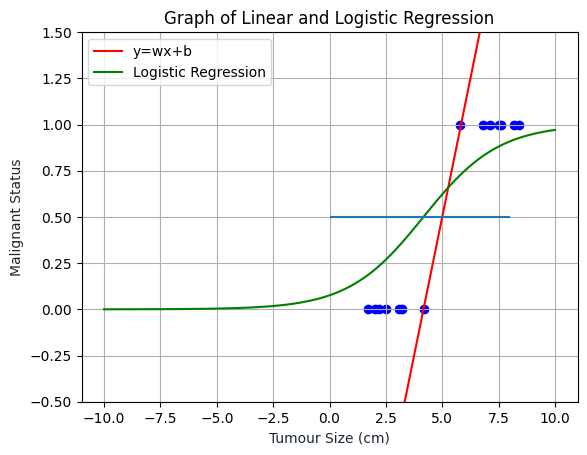

In [27]:

w = 0.6
b = -2.5

x = np.linspace(-10, 10, 100)
y = linear_function(w, x, b)

y_sigmoid = sigmoid_function(y)

# plt.plot(x_sigmoid, y_sigmoid, label="Linear Function")
# plt.title('Linear Function')
# plt.legend(loc='best')
# plt.show()

plt.scatter(tumour_size, malignant_status, color="blue")
plt.plot(x, y, "-r", label="y=wx+b")
plt.plot(x, y_sigmoid, "-g", label="Logistic Regression")
plt.title("Graph of Linear and Logistic Regression")
plt.xlabel('Tumour Size (cm)', color='#1C2833')
plt.ylabel('Malignant Status', color='#1C2833')
plt.hlines(xmin=0, xmax=8, y=0.5)
plt.ylim([-0.5, 1.5])  # Set the limits of y-axis here
plt.legend(loc='best')
plt.grid()
plt.show()


In [38]:
# Feature (Tumour Size)
X = tumour_size.values.reshape(-1, 1)

# Target Variable (Malignant Status)
y = malignant_status

model = LogisticRegression()
model.fit(X, y)

coefficient = model.coef_ #w
intercept = model.intercept_ #b

In [40]:
print("Coefficient", coefficient)
print("intercept", intercept)

Coefficient [[1.3697619]]
intercept [-6.86687358]


Decision Boundary 5.013187763221892


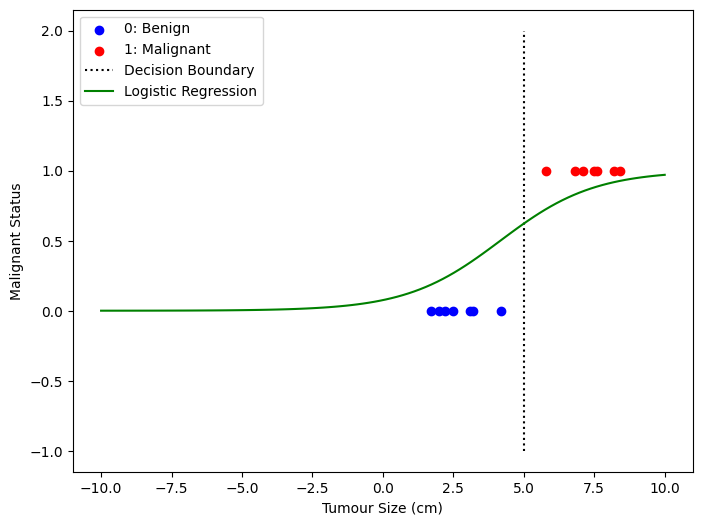

In [43]:
# Calculate the decision boundary
decision_boundary = -intercept/coefficient
decision_boundary = decision_boundary[0][0]  # Extract the value from the numpy array

print("Decision Boundary", decision_boundary)

# Plot the data along with the decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X[y==0], y[y==0], color='b', label='0: Benign')
plt.scatter(X[y==1], y[y==1], color='r', label='1: Malignant')
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", label="Decision Boundary")
plt.plot(x, y_sigmoid, '-g', label='Logistic Regression')
plt.xlabel('Tumour Size (cm)')
plt.ylabel('Malignant Status')
plt.legend()
plt.show()

### **Loss Function on Logistic Regression (Log Loss)**

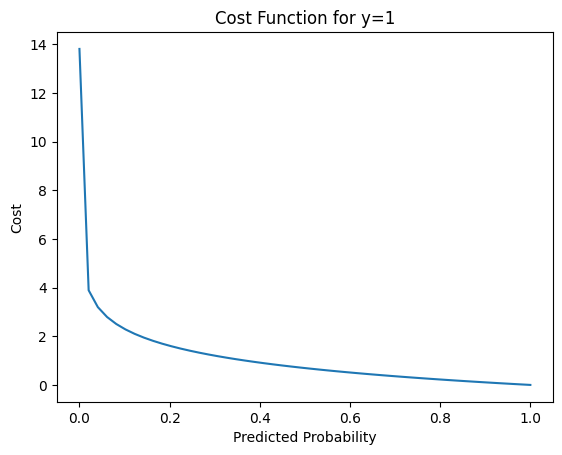

In [45]:
# Predicted probality range from 0 to 1
h = np.linspace(0.000001, 0.999999)

# Cost when y=1
cost = -np.log(h)

plt.plot(h, cost)
plt.xlabel("Predicted Probability")
plt.ylabel("Cost")
plt.title("Cost Function for y=1")
plt.show()

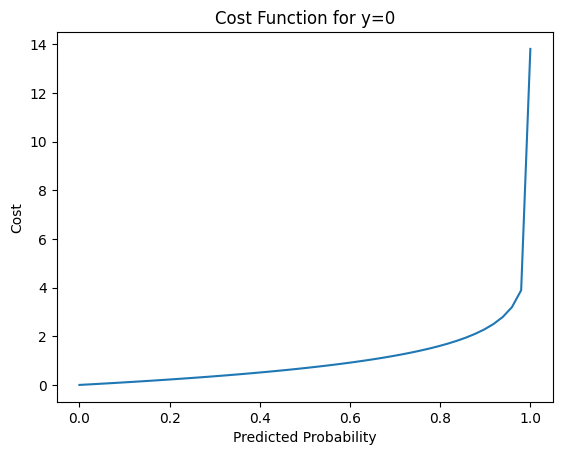

In [46]:
# Predicted probability range from 0 to 1
h = np.linspace(0.000001, 0.999999)

# Cost when y=1
cost = -np.log(1 - h)

plt.plot(h, cost)
plt.xlabel('Predicted Probability')
plt.ylabel('Cost')
plt.title('Cost Function for y=0')
plt.show()